In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("Data.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
(data.isnull().sum() / len(data)) * 100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Preprocessing


In [10]:
# Extract day, month, and year from 'Date_of_Journey'

data['Day_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day
data['Month_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month
data['Year_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.year

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,3,2019


In [12]:
# Convert 'Dep_Time' and 'Arrival_Time' to datetime and extract hour and minute
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,3,2019,16,50,21,35


In [14]:
# Convert 'Duration' into total minutes
duration = data['Duration'].str.extract('(?:(\d+)h)?\s*(?:(\d+)m)?').fillna(0)
data['Duration_Minutes'] = duration[0].astype(int) * 60 + duration[1].astype(int)

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019,22,20,1,10,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,12,5,2019,18,5,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,3,2019,16,50,21,35,285


In [16]:
# Convert 'Total_Stops' to an ordinal feature
stops = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date_of_Journey   10682 non-null  object
 2   Source            10682 non-null  object
 3   Destination       10682 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10682 non-null  object
 6   Arrival_Time      10682 non-null  object
 7   Duration          10682 non-null  object
 8   Total_Stops       10682 non-null  int64 
 9   Additional_Info   10682 non-null  object
 10  Price             10682 non-null  int64 
 11  Day_of_Journey    10682 non-null  int64 
 12  Month_of_Journey  10682 non-null  int64 
 13  Year_of_Journey   10682 non-null  int64 
 14  Dep_Hour          10682 non-null  int64 
 15  Dep_Minute        10682 non-null  int64 
 16  Arrival_Hour      10682 non-null  int64 
 17  Arrival_Minu

## EDA

### Distribution of Ticket Prices

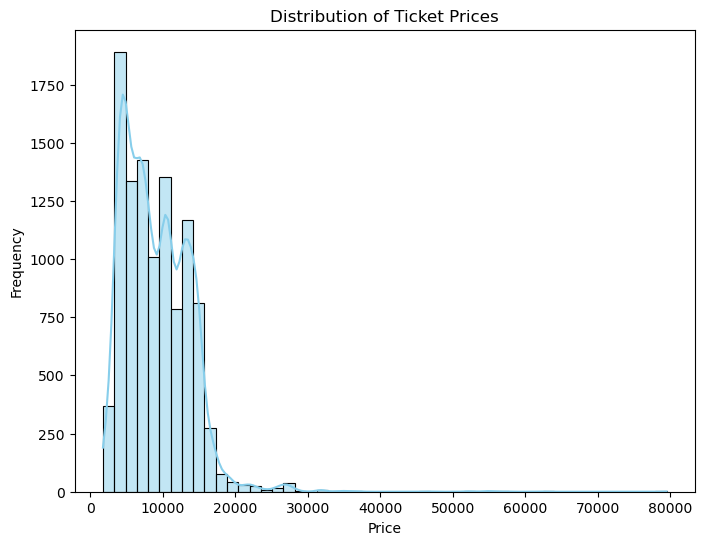

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'Price' column
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Inference
- The distribution is right-skewed, indicating that most of the ticket prices are concentrated on the lower end of the price spectrum, with fewer tickets priced higher.
- The highest frequency of ticket prices falls within the lower price range, specifically between 0 and 10,000. This range includes the peak of the distribution.
- The skewness may also be influenced by factors like demand, duration, and the number of stops.

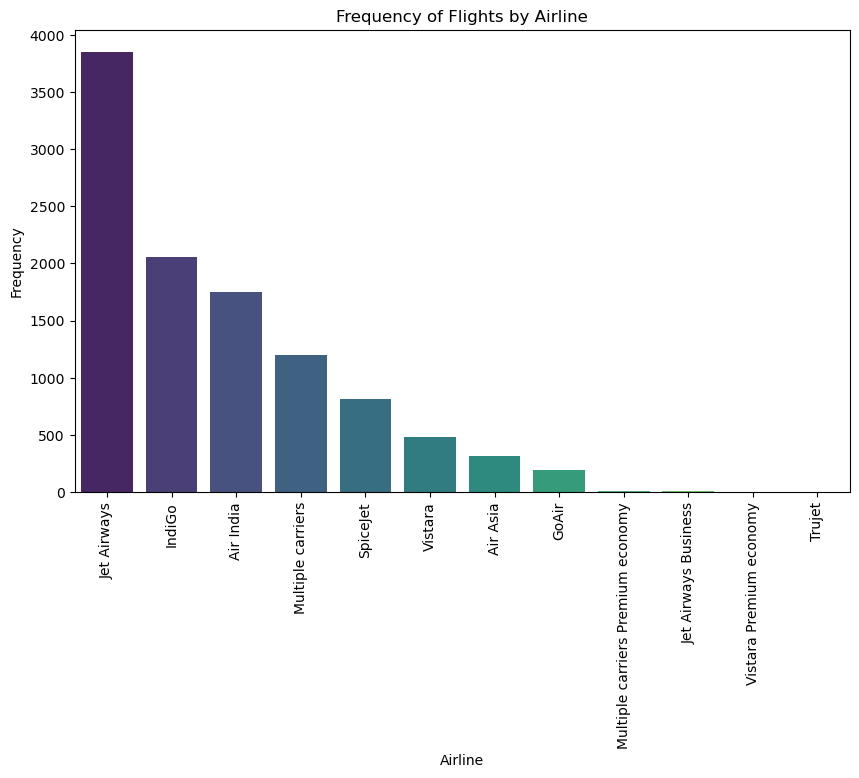

In [19]:
# Countplot for Airline vs Frequency
plt.figure(figsize=(10, 6))

sns.countplot(x='Airline', data=data, order=data['Airline'].value_counts().index, palette='viridis')

plt.title('Frequency of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

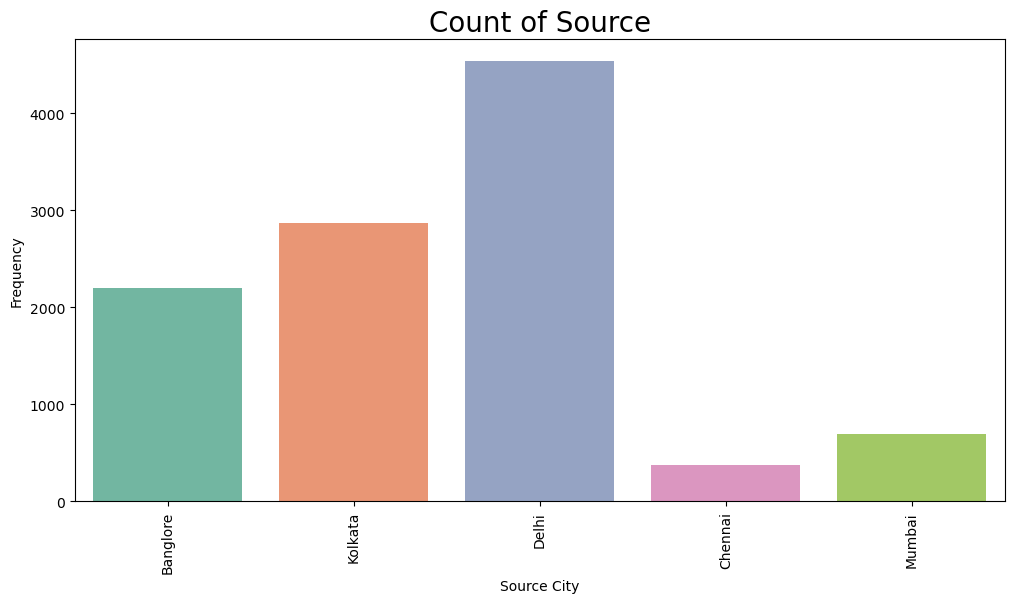

In [20]:
# Bar Plot of Source vs. Destination
plt.figure(figsize=(12, 6))

sns.countplot(x='Source', data=data, palette='Set2')
plt.title('Count of Source', size=20)
plt.xticks(rotation=90)
plt.xlabel('Source City')
plt.ylabel('Frequency')

plt.show()


#### Inference
- Delhi is the most common departure city among all the flights in your dataset and Chennai has relatively fewer flights departing compared to other cities.


### Boxplots for Categorical Features

#### Impact of Airline on Ticket Price

In [21]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

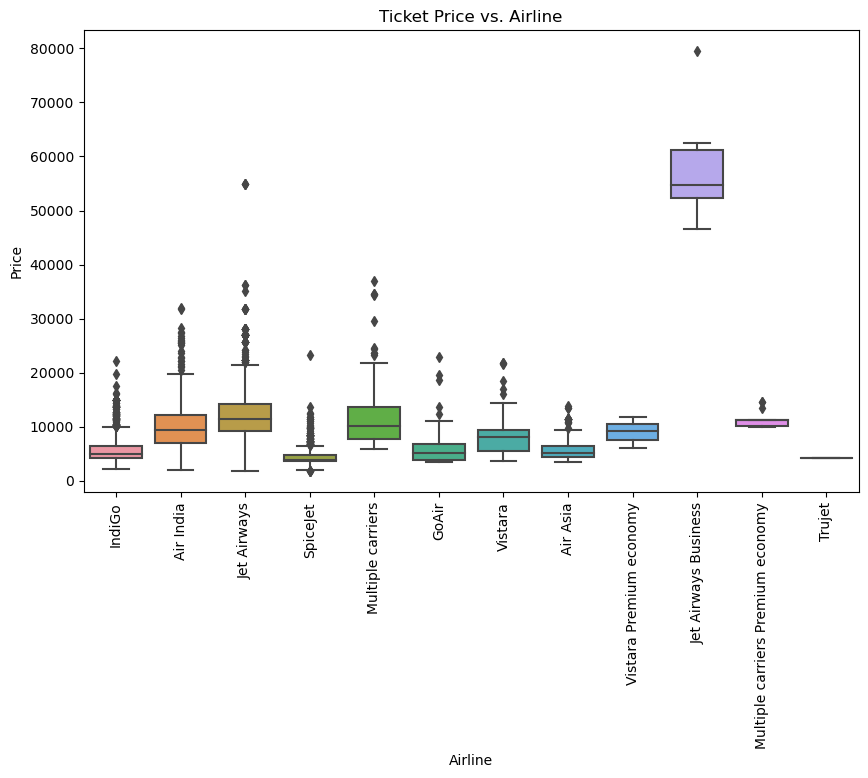

In [22]:
# Impact of Airline on Ticket Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('Ticket Price vs. Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

#### Inference
- Jet Airways Business and Vistara Premium Economy have the highest median ticket prices
- IndiGo, SpiceJet, and GoAir have lower median prices, indicating that these are more budget-friendly options.
- The chart provides a clear view of how each airline positions itself in terms of pricing. Premium carriers clearly stand out with higher median prices, while budget airlines cluster towards the lower end.

In [23]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [25]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head(10)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [27]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


####  Impact of Number of Stops on Ticket Price

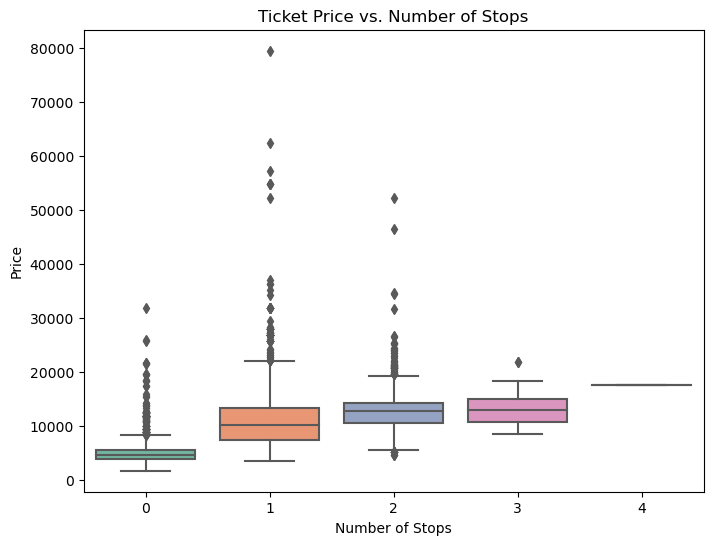

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data, palette='Set2')
plt.title('Ticket Price vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

#### Inference
- Non-stop flights (0 stops) tend to have a lower median price compared to flights with 1 or 2 stops. However, non-stop flights also have a more compact price range, indicating that prices for these flights are generally consistent.
- As the number of stops increases, the spread of ticket prices also increases. This could indicate that flights with more stops have a more variable pricing structure, possibly due to differences in flight durations, airline choices, and demand.
- The data implies that the number of stops is a significant factor in determining the price of a flight, with more stops generally leading to more price variability.


In [29]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [30]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

####  Impact of Source and Destination on Ticket Price

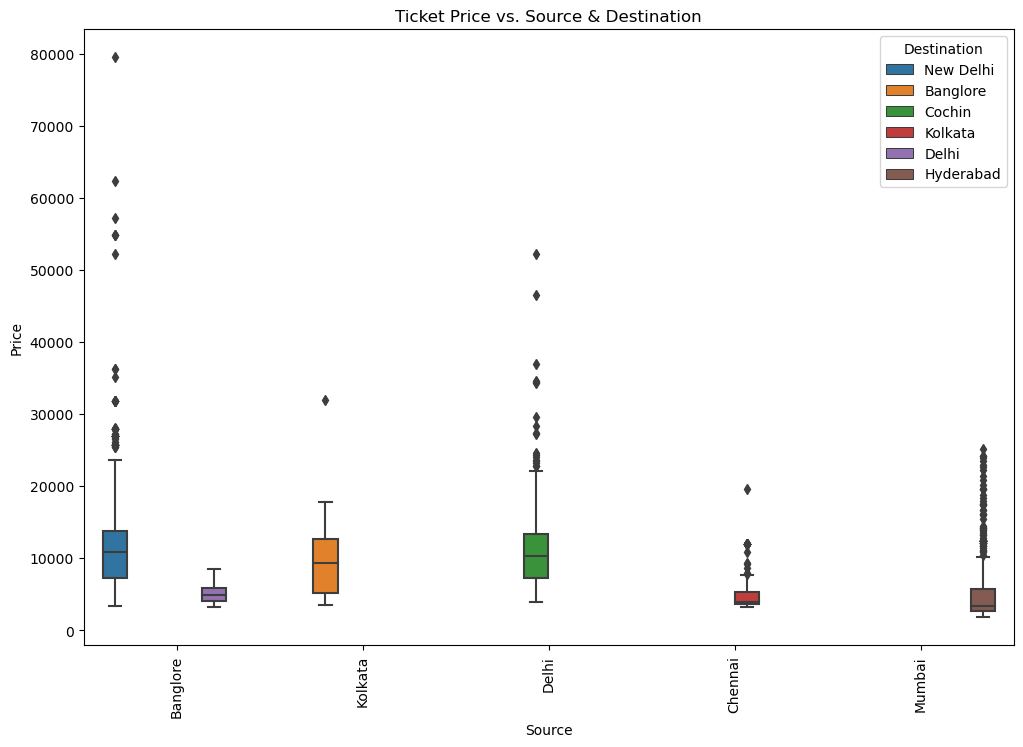

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Source', y='Price', data=data, hue='Destination')
plt.xticks(rotation=90)
plt.title('Ticket Price vs. Source & Destination')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

#### Inference
- This plot demonstrates how ticket prices vary depending on the combination of the departure and arrival cities.
- Certain routes, such as those from major cities like Delhi and Mumbai, tend to have higher prices, especially when flying to popular destinations.

#### Impact of Month of Journey on Price

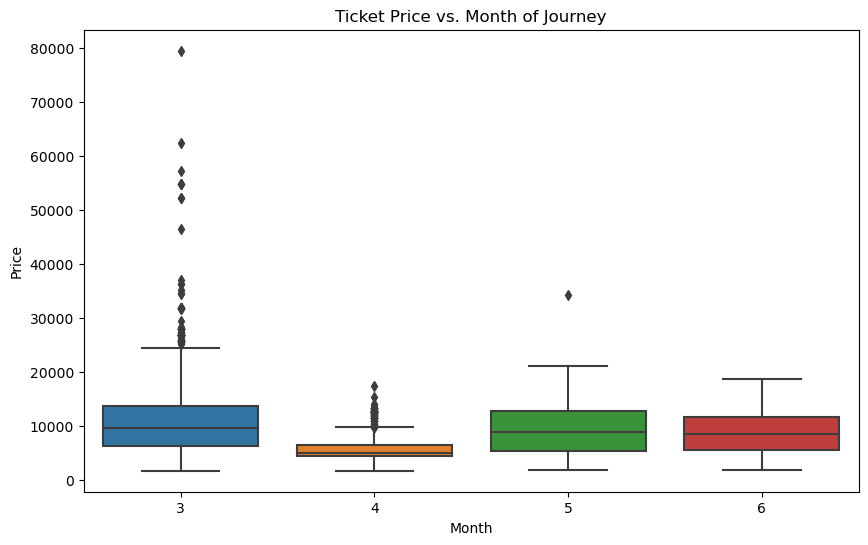

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month_of_Journey', y='Price', data=data)
plt.title('Ticket Price vs. Month of Journey')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

#### Inference
- March appears to have the highest median ticket prices among the months shown, along with a larger spread of prices. The presence of several outliers, including some extremely high prices, suggests that March might be a peak travel period, possibly due to holidays
- Airlines might increase prices in March due to higher demand, while offering more competitive pricing in April to attract passengers during a lower-demand period.
- The consistency in pricing during May and June might reflect steady demand, with airlines maintaining stable pricing strategies.

#### Average Ticket Price Over Time

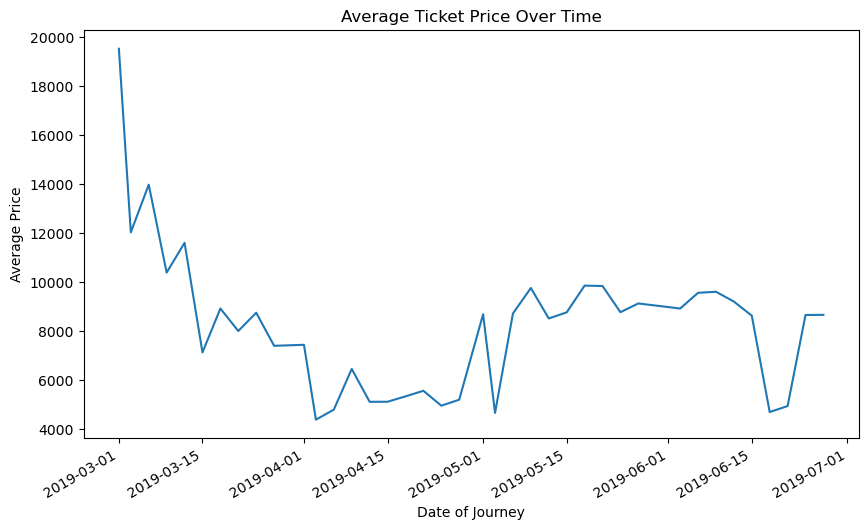

In [33]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
avg_price_by_date = data.groupby('Date_of_Journey')['Price'].mean()

plt.figure(figsize=(10, 6))
avg_price_by_date.plot()
plt.title('Average Ticket Price Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.show()

In [34]:
# Dropping Date_of_Journey. Dep_Time and Arrival_Time as we have extracted the information
data.drop(["Date_of_Journey"], axis = 1, inplace = True)
data.drop(["Dep_Time"], axis = 1, inplace = True)
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [35]:
# As we dont need Year_of_Journey data so we are dropping it
data.drop(["Year_of_Journey"], axis = 1, inplace = True)

#### Heatmap of Correlations

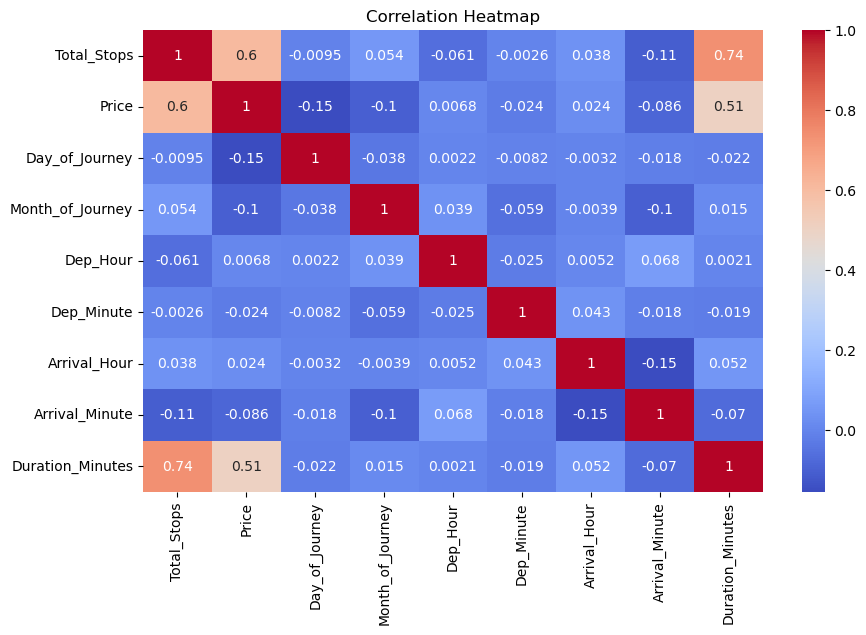

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Inference
- Total_Stops and Duration_Minutes are key features that influence the ticket price and should be carefully considered in the model.
- Departure and Arrival Times have minimal impact on pricing, suggesting that airlines may not heavily factor in the time of day when setting ticket prices.


#### Distribution of Flight Durations

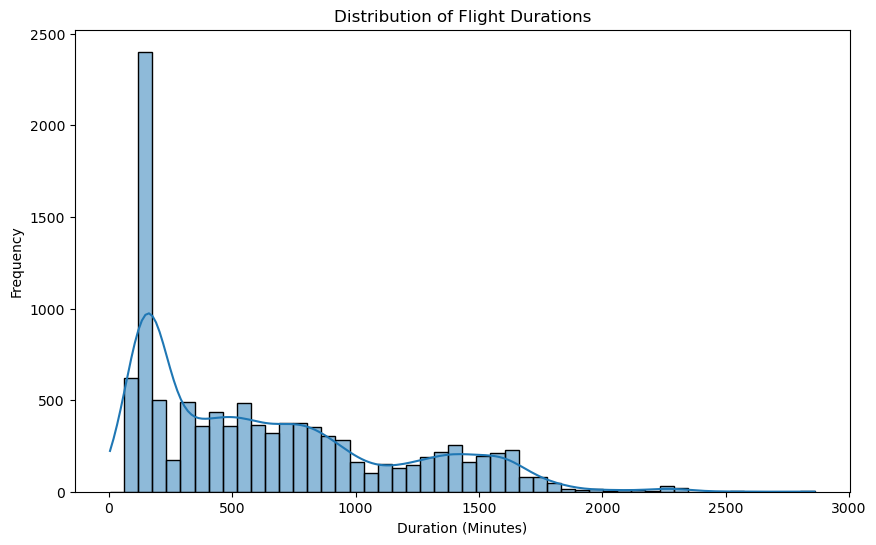

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Duration_Minutes'], kde=True, bins=50)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

#### Inference
- Most flights are relatively short, with durations under 100 minutes being the most common.
- There is a wide range of flight durations, indicating a mix of domestic and international routes or flights with varying numbers of stops.
- The presence of outliers with very long durations may need further investigation to ensure data accuracy or to handle them appropriately in the analysis.

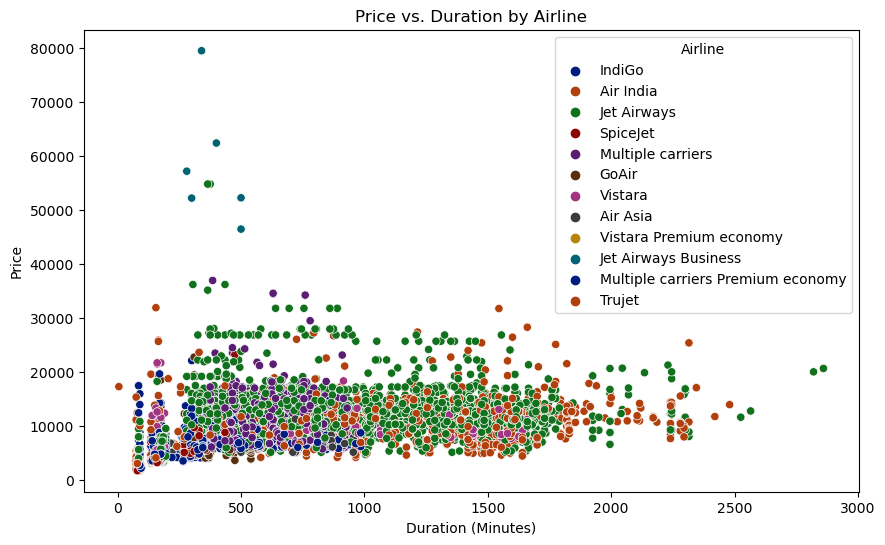

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Price', hue='Airline', data=data, palette='dark')
plt.title('Price vs. Duration by Airline')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price')
plt.show()

#### Inference
-  Different airlines exhibit distinct pricing patterns, with premium carriers like Jet Airways and Vistara showing higher price ranges.
- Budget airlines are clustered at lower price points, while premium airlines show a broader range of prices, especially for longer flights.

#### Price Distribution by Number of Stops

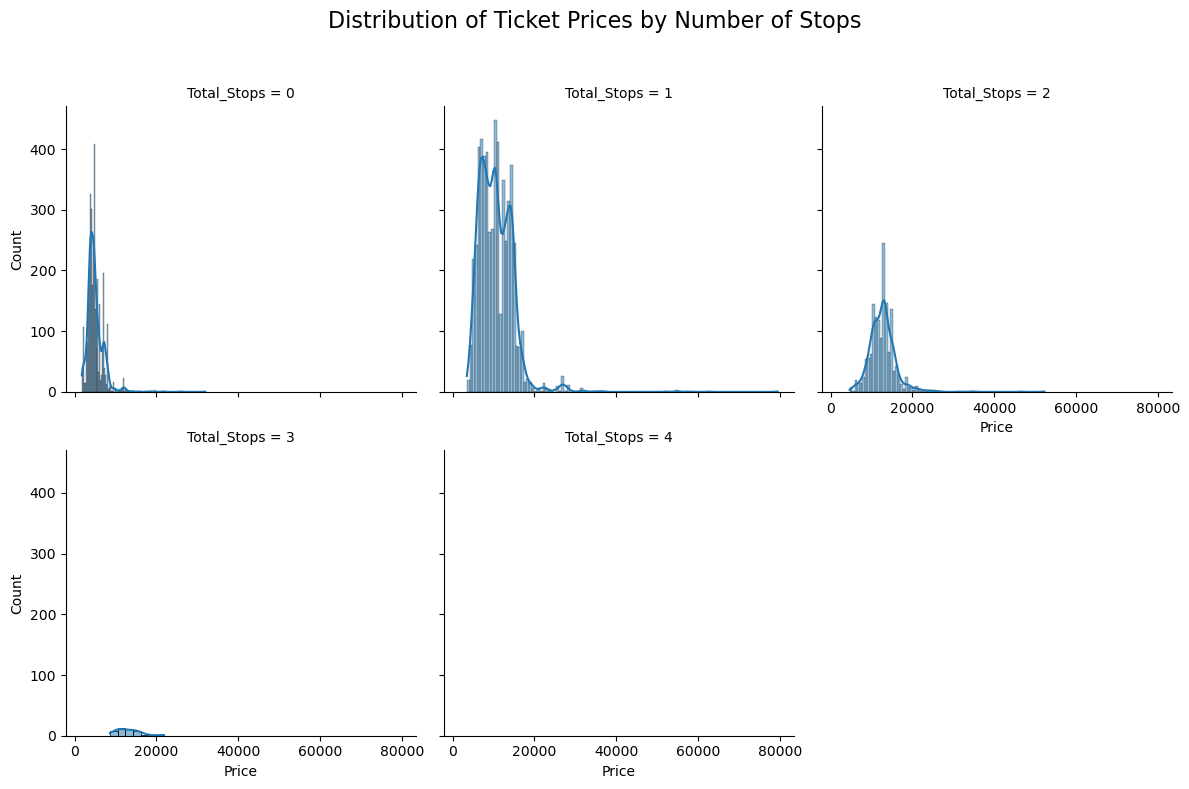

In [39]:
g = sns.FacetGrid(data, col='Total_Stops', col_wrap=3, height=4, aspect=1)
g.map(sns.histplot, 'Price', kde=True)
g.fig.suptitle('Distribution of Ticket Prices by Number of Stops', fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Inference
- As the number of stops increases, there is a general trend towards higher prices, particularly for one- and two-stop flights. This reflects the added travel time, complexity, and possibly fewer available flights for these routes.
- Non-stop flights are the most affordable on average, likely due to higher competition and demand for direct routes.

In [40]:
data['Additional_Info'].unique()

array(['Null ', 'Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [41]:
data['Additional_Info'].replace('', np.nan, inplace=True)  # Replace empty strings with NaN
data['Additional_Info'].fillna('No Info', inplace=True)  # Replace all NaNs/None with a placeholder


In [42]:
data['Additional_Info'] = data['Additional_Info'].str.strip()

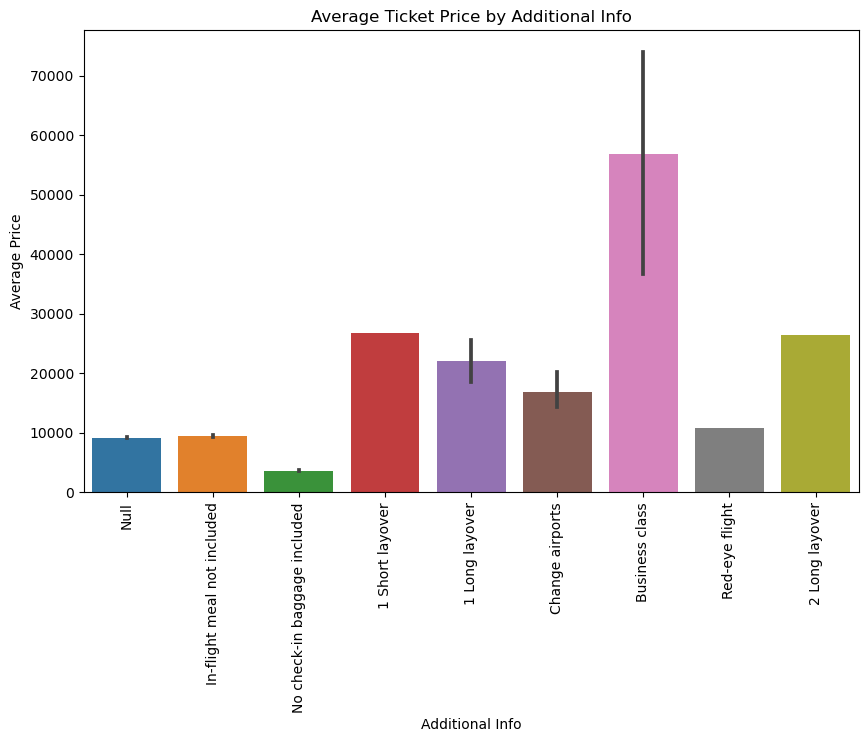

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Additional_Info', y='Price', data=data, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Average Ticket Price by Additional Info')
plt.xlabel('Additional Info')
plt.ylabel('Average Price')
plt.show()

#### Inference
- Premium Services: Business class is by far the most expensive category, which is expected due to the premium nature of these services.
- Budget-Friendly Options: Categories like "No check-in baggage included" and "In-flight meal not included" have lower prices, likely representing budget options aimed at cost-conscious travelers.
- Layover Impact: Layovers tend to increase the ticket price, with short layovers being more expensive than long ones, possibly due to the reduced convenience and longer overall travel time.

In [44]:
# Additional_Info contains almost no important information
# Route and Total_Stops are related to each other, so we drop those as well

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [45]:
# Concatenate dataframe --> Data + Airline + Source + Destination

data_new = pd.concat([data, Airline, Source, Destination], axis = 1)

In [46]:
data_new.drop(["Airline", "Source", "Destination","Duration"], axis = 1, inplace = True)

In [47]:
data_new.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,...,0,0,0,0,0,0,0,0,0,1


### Feature selection

In [48]:
data_new.shape

(10682, 29)

In [49]:
data_new.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [50]:
X = data_new.loc[:,['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [51]:
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
y = data_new.iloc[:, 1]

In [53]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

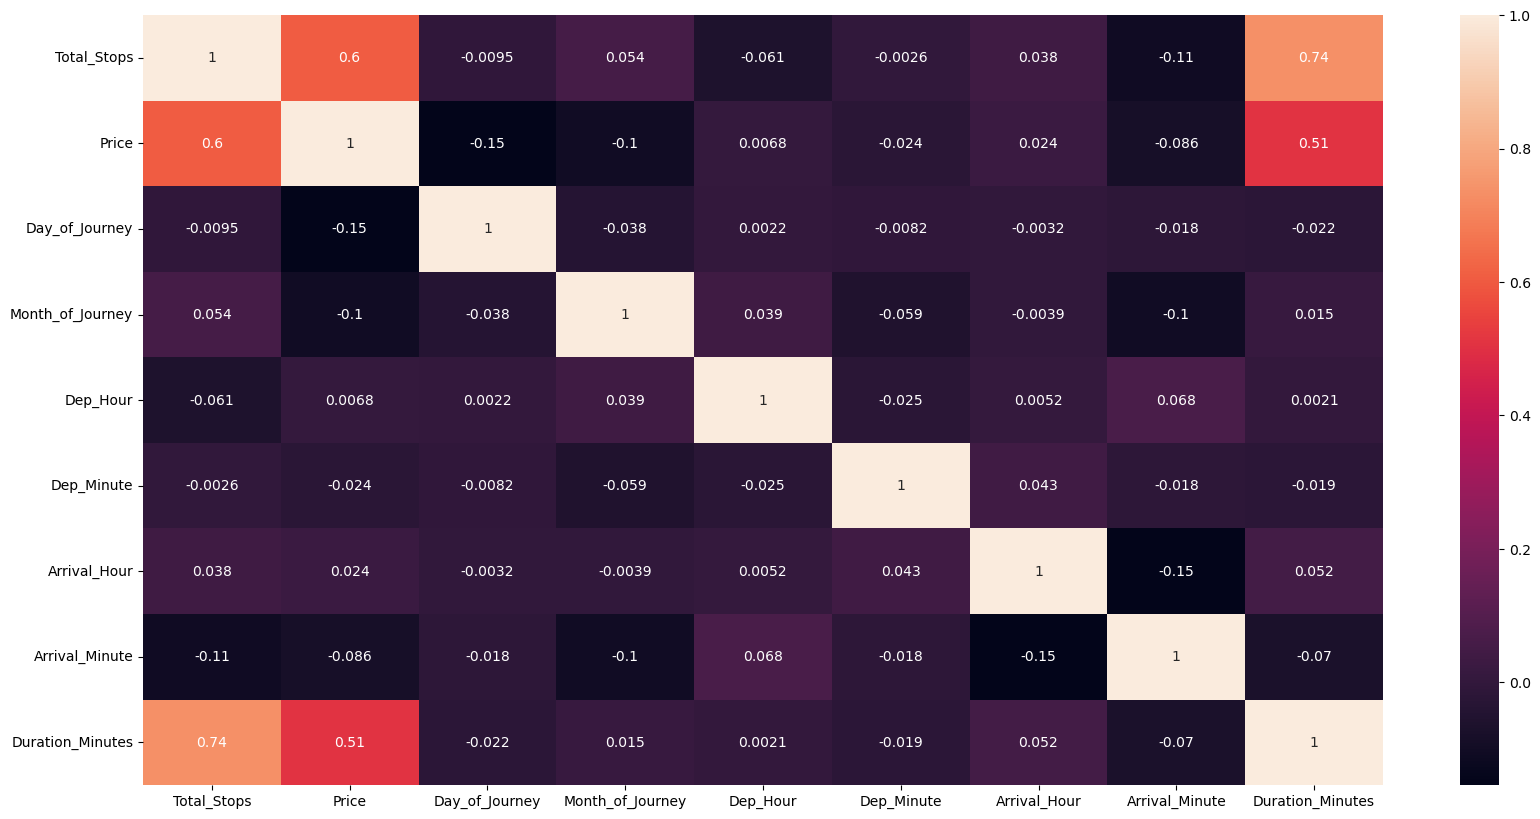

In [54]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

In [56]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [57]:
print(selection.feature_importances_)

[2.37169977e-01 1.44488872e-01 5.27358300e-02 2.61571234e-02
 2.55075170e-02 2.87999766e-02 2.23963233e-02 1.33523740e-01
 9.14271208e-03 1.93253878e-03 1.66327777e-02 1.31947096e-01
 6.73061733e-02 2.05129851e-02 8.38548282e-04 3.05919861e-03
 1.05946196e-04 5.01899174e-03 6.36080587e-05 4.35685827e-04
 9.80513189e-03 3.41392497e-03 5.90247617e-03 6.72345337e-03
 1.40735568e-02 6.98586563e-03 4.13570367e-04 2.49063999e-02]


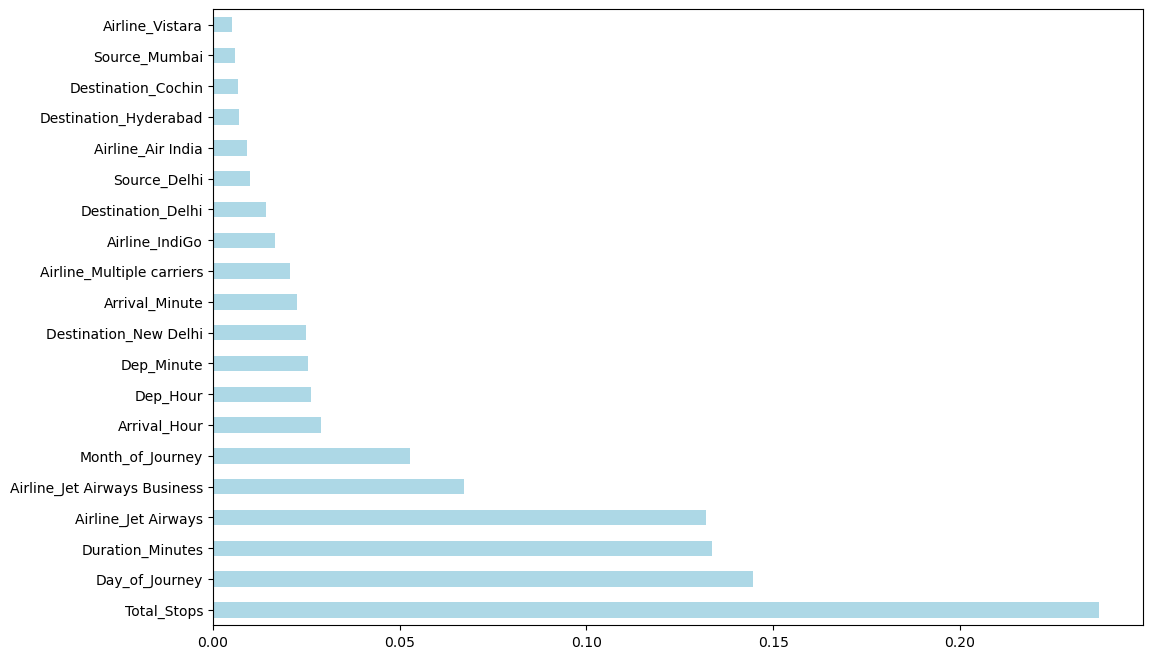

In [58]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh' , color ='lightblue')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
y_train.shape,X_test.shape,X_train.shape,y_test.shape

((8545,), (2137, 28), (8545, 28), (2137,))

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
reg_rf = RandomForestRegressor()

In [75]:
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
y_pred = reg_rf.predict(X_test)

In [77]:
reg_rf.score(X_train, y_train)

0.9525930443620697

In [78]:
reg_rf.score(X_test, y_test)

0.82373648850312

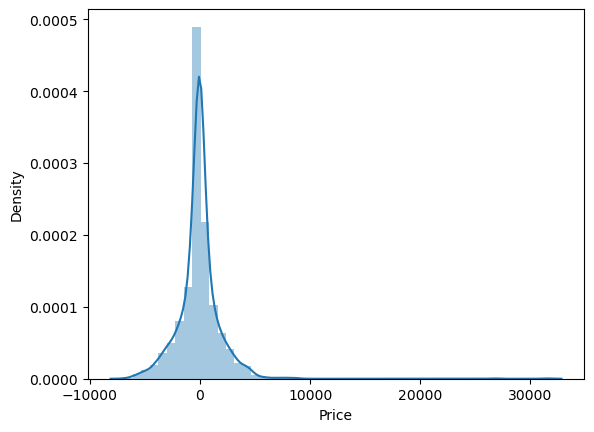

In [80]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

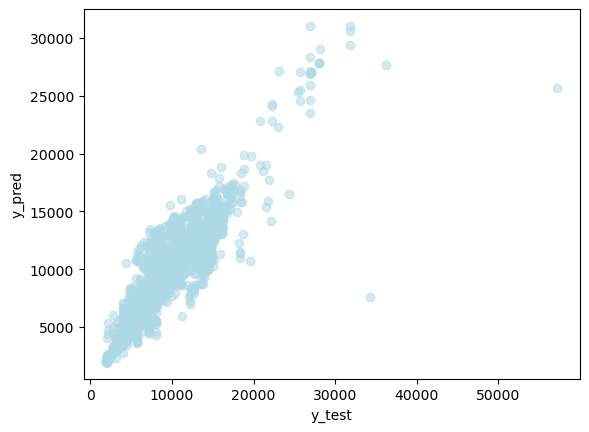

In [81]:
plt.scatter(y_test, y_pred, alpha = 0.5 , color ='lightblue')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [82]:
from sklearn import metrics

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1158.1866404240614
MSE: 3800603.762790267
RMSE: 1949.5137246991278


In [84]:
#NormalizedRMSE: RMSE/(max(DV)-min(DV))
np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y)-min(y))

0.02507316405410888

In [85]:
metrics.r2_score(y_test, y_pred)

0.82373648850312

### Hyperparameter Tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

In [93]:
max_features = ['auto', 'sqrt']

In [94]:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [95]:
min_samples_split = [2, 5, 10, 15, 100]

In [96]:
min_samples_leaf = [1, 2, 5, 10]

In [97]:
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [98]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [99]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [101]:
prediction = rf_random.predict(X_test)

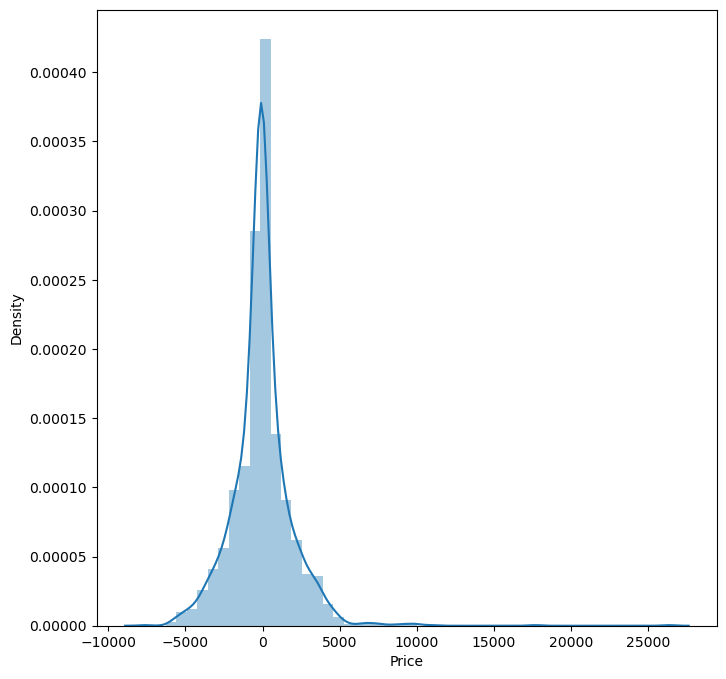

In [103]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

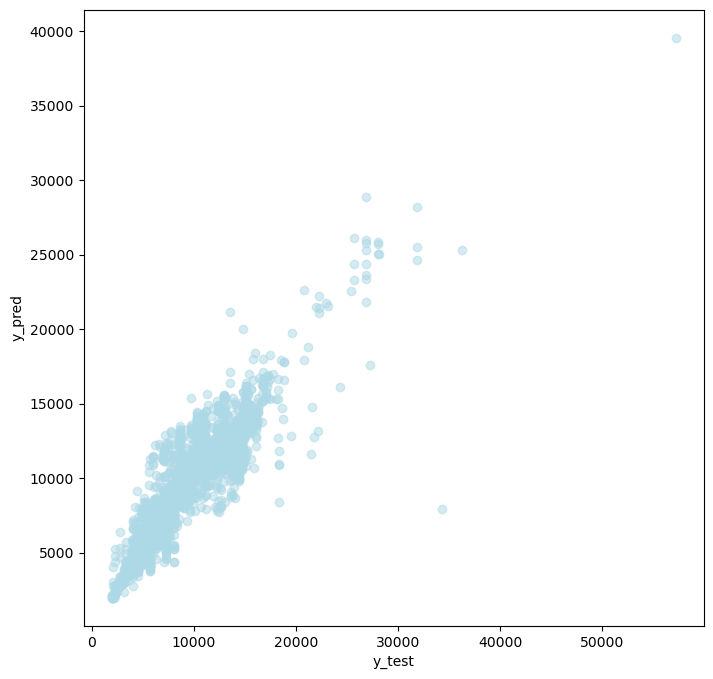

In [104]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5 , color ='lightblue')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [106]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R-squared:', metrics.r2_score(y_test, prediction))

MAE: 1251.3327307422333
MSE: 3818056.0169828623
RMSE: 1953.9846511635812
R-squared: 0.822927091944173
